# ++pyqsar tutorial for multiple linear regression model++
### Sinyoung Kim
### crong24601@gmail.com
### Release : 06 December 2017
---

In [7]:
! python -V

Python 2.7.13 :: Anaconda custom (64-bit)


## Data load

In [12]:
import pandas as pd
sample_data = pd.read_csv('sample_data.csv',sep=",")

X_data = sample_data.iloc[:,1:-2]
y_data = sample_data.iloc[:,-1:]

In [13]:
X_data.head()

,MW,AMW,Sv,Se,Sp,Mv,Me,Mp,Mi,nAT,...,DLS_03,DLS_04,DLS_05,DLS_cons,LLS_01,LLS_02,MlogP_o,X3v_o,H-04_o,F01[C-C]_o
0,148.91,29.782,4.229,6.534,3.688,0.846,1.307,0.738,1.338,5,...,0.83,0.3,0.0,0.66,1.0,0.88,1.817,0.000,0,0
1,100.05,11.117,5.445,10.516,4.551,0.605,1.168,0.506,1.275,9,...,0.83,0.9,1.0,0.91,1.0,1.00,0.580,0.179,0,1
2,114.03,14.254,5.633,9.960,4.244,0.704,1.245,0.531,1.284,8,...,0.83,0.8,0.5,0.83,1.0,1.00,0.366,0.243,0,1
3,187.37,23.421,7.213,10.160,6.670,0.902,1.270,0.834,1.262,8,...,0.83,0.5,0.5,0.76,1.0,0.88,2.783,1.250,0,1
4,132.07,11.006,7.355,13.913,6.250,0.613,1.159,0.521,1.269,12,...,0.83,0.9,1.0,0.94,1.0,1.00,1.209,0.530,1,2


In [14]:
X_data.shape

(56, 1615)

In [15]:
y_data.head()

,binary
0,1
1,1
2,1
3,1
4,1


In [16]:
y_data.shape

(56, 1)

## Hello pyqsar!

In [17]:
import pyqsar

## Widget for data

In [18]:
from pyqsar import data_tools as dt

In [19]:
dt.SearchFeature(X_data)

<pyqsar.data_tools.SearchFeature instance at 0x00000000104A8888>

In [20]:
%matplotlib inline
dt.ScatterMatrix(X_data)

<pyqsar.data_tools.ScatterMatrix instance at 0x00000000104A8348>

## Remove empty feature

In [21]:
X_data.shape

(56, 1553)

In [22]:
X_data = dt.rm_empty_feature(X_data)

In [23]:
X_data.shape

(56, 1552)

## Remove NaN

In [24]:
X_data.shape

(56, 1552)

In [25]:
X_data = dt.rmNaN(X_data)

In [26]:
X_data.shape

(56, 1552)

## Data scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler
header = list(X_data.columns.values)
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)
X_data = pd.DataFrame(X_data_scaled, columns=header)

In [28]:
X_data.head()

,MW,AMW,Sv,Se,Sp,Mv,Me,Mp,Mi,nAT,...,DLS_03,DLS_04,DLS_05,DLS_cons,LLS_01,LLS_02,MlogP_o,X3v_o,H-04_o,F01[C-C]_o
0,0.147617,0.816056,0.000000,0.000000,0.038042,0.731458,0.929688,0.524946,0.772512,0.000000,...,0.0,0.000000,0.0,0.083333,1.0,0.52,0.330901,0.000000,0.0,0.000000
1,0.011145,0.093559,0.075406,0.137434,0.117151,0.115090,0.386719,0.021692,0.473934,0.181818,...,0.0,1.000000,1.0,0.777778,1.0,1.00,0.048803,0.062239,0.0,0.142857
2,0.050193,0.214988,0.087064,0.118244,0.089009,0.368286,0.687500,0.075922,0.516588,0.136364,...,0.0,0.833333,0.5,0.555556,1.0,1.00,0.000000,0.084492,0.0,0.142857
3,0.255042,0.569830,0.185043,0.125147,0.311394,0.874680,0.785156,0.733189,0.412322,0.136364,...,0.0,0.333333,0.5,0.361111,1.0,0.52,0.551197,0.434631,0.0,0.142857
4,0.100581,0.089262,0.193848,0.254677,0.272894,0.135550,0.351562,0.054230,0.445498,0.318182,...,0.0,1.000000,1.0,0.861111,1.0,1.00,0.192246,0.184284,0.5,0.285714


## Feature clustering for feature selection

In [25]:
from pyqsar import clustering as cl

In [61]:
# calculate cophenetic correlation coefficient 
cl.cophenetic(X_data)

average linkage cophenet: 0.766126815693
complete linkage cophenet: 0.767178530252
single linkage cophenet: 0.303907183415


In [26]:
# clustering
clust = cl.FeatureCluster(X_data, 'average', 3)
clust_info = clust.set_cluster()


Cluster 1 ['H3e', 'H3v'] 
Cluster 2 ['H3u'] 
Cluster 3 ['F03[C-F]'] 
Cluster 4 ['ATSC3e', 'ATSC2e'] 
Cluster 5 ['ATSC2s', 'Mor05e', 'ATSC3s', 'Mor10p', 'Mor10v'] 
Cluster 6 ['SIC0'] 
Cluster 7 ['CIC1'] 
Cluster 8 ['Mor08u', 'Mor08e'] 
Cluster 9 ['Mor27e', 'Mor27u'] 
Cluster 10 ['RDF035m', 'RDF035s', 'F03[F-F]'] 
Cluster 11 ['Eig13_AEA(ed)', 'Eig12_AEA(ed)', 'SpMax3_Bh(s)'] 
Cluster 12 ['F02[C-F]', 'H3s'] 
Cluster 13 ['H4s', 'H4v'] 
Cluster 14 ['H4m'] 
Cluster 15 ['RDF025m', 'RDF025s'] 
Cluster 16 ['F04[F-F]'] 
Cluster 17 ['DBI', 'SpAD_EA(dm)'] 
Cluster 18 ['MAXDN', 'P_VSA_MR_2', 'ATS2s'] 
Cluster 19 ['Chi_Dz(v)'] 
Cluster 20 ['Eig03_EA(dm)', 'ChiA_D/Dt'] 
Cluster 21 ['P_VSA_s_6'] 
Cluster 22 ['EE_B(s)', 'P_VSA_i_4', 'nF', 'RTs', 'P_VSA_LogP_5', 'SM1_Dz(i)', 'ATSC1s', 'ATSC1e', 'ATSC1i', 'SM1_Dz(e)', 'DELS', 'QXXs'] 
Cluster 23 ['SM1_Dz(v)', 'P_VSA_m_3', 'P_VSA_v_2', 'nHAcc', 'SpMAD_Dz(p)'] 
Cluster 24 ['Mor02m'] 
Cluster 25 ['Mor32u', 'Mor32e'] 
Cluster 26 ['Mor09u', 'Mor09e', 'Mor10u

Cluster 232 ['AVS_B(p)'] 
Cluster 233 ['PDI'] 
Cluster 234 ['ChiA_B(p)'] 
Cluster 235 ['AVS_B(v)'] 
Cluster 236 ['SpMAD_EA(bo)'] 
Cluster 237 ['H_Dz(p)'] 
Cluster 238 ['SpMax1_Bh(p)'] 
Cluster 239 ['MATS1i'] 
Cluster 240 ['SM05_AEA(ri)', 'Eig10_AEA(ri)'] 
Cluster 241 ['Eig10_EA(bo)', 'Eig10_EA(ri)', 'SM04_AEA(dm)'] 
Cluster 242 ['Eig11_EA(bo)', 'Eig11_AEA(ri)', 'SM06_AEA(ri)', 'SM05_AEA(dm)'] 
Cluster 243 ['Eig11_EA(dm)'] 
Cluster 244 ['AVS_B(e)', 'AVS_B(i)'] 
Cluster 245 ['SpDiam_EA(bo)'] 
Cluster 246 ['X5v', 'piPC06', 'X4sol'] 
Cluster 247 ['F02[C-C]', 'F01[C-C]_o', 'F01[C-C]'] 
Cluster 248 ['SpMax1_Bh(v)'] 
Cluster 249 ['Mor02p'] 
Cluster 250 ['RDF035p'] 
Cluster 251 ['X5sol', 'piPC07'] 
Cluster 252 ['MPC07'] 
Cluster 253 ['Vindex', 'GNar', 'SpPosA_H2'] 
Cluster 254 ['HNar'] 
Cluster 255 ['Mor20v'] 
Cluster 256 ['SpMin1_Bh(v)', 'SpMin1_Bh(e)'] 
Cluster 257 ['X5Av'] 
Cluster 258 ['ATSC4v'] 
Cluster 259 ['R3i+', 'R3e+'] 
Cluster 260 ['R3u+'] 
Cluster 261 ['X3A'] 
Cluster 262 ['P_VSA_m

Cluster 650 ['SpMaxA_D/Dt'] 
Cluster 651 ['SaasC', 'C-026', 'F-084', 'nArX'] 
Cluster 652 ['P_VSA_s_3'] 
Cluster 653 ['nCb-'] 
Cluster 654 ['Mor29v'] 
Cluster 655 ['Mor29p'] 
Cluster 656 ['E3e', 'E3i'] 
Cluster 657 ['E3u'] 
Cluster 658 ['Eta_sh_y'] 
Cluster 659 ['Mor16p'] 
Cluster 660 ['P_VSA_MR_1'] 
Cluster 661 ['Eta_B_A'] 
Cluster 662 ['SpPosA_X'] 
Cluster 663 ['AVS_X'] 
Cluster 664 ['SpMAD_EA(dm)'] 
Cluster 665 ['Eig09_AEA(bo)'] 
Cluster 666 ['Eig08_AEA(ri)'] 
Cluster 667 ['Eig09_AEA(dm)'] 
Cluster 668 ['Eig07_EA(ri)', 'SM15_AEA(bo)', 'SM02_AEA(ri)'] 
Cluster 669 ['Eig07_EA(dm)'] 
Cluster 670 ['BIC2', 'SIC2'] 
Cluster 671 ['RARS', 'REIG'] 
Cluster 672 ['Mor12p'] 
Cluster 673 ['Mor14p'] 
Cluster 674 ['Eig14_AEA(bo)'] 
Cluster 675 ['Eig15_AEA(bo)'] 
Cluster 676 ['Mor13i', 'Mor13e'] 
Cluster 677 ['Mor12m'] 
Cluster 678 ['Mor05s'] 
Cluster 679 ['Eig12_AEA(dm)'] 
Cluster 680 ['Eig13_AEA(dm)'] 
Cluster 681 ['S3K'] 
Cluster 682 ['Mor15m'] 
Cluster 683 ['DLS_01'] 
Cluster 684 ['Mor24u', 'Mo

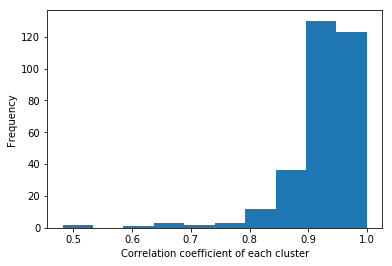

In [66]:
clust.cluster_dist()

## Feature selection_using single core

In [28]:
from pyqsar import feature_selection_single as fss
select = fss.selection(X_data, y_data, clust_info, model='classification', learning=1000, bank=200, component=4,pntinterval=100)

Start time :  22:41:46
Classification
100 => 22:42:13 [0.8928571428571429, ['B03[C-N]', 'X3Av', 'X5Av', 'nCIC']]
200 => 22:42:39 [0.9464285714285714, ['B03[C-N]', 'N%', 'nTB', 'piPC07']]
300 => 22:43:04 [0.9464285714285714, ['B03[C-N]', 'N%', 'nTB', 'piPC07']]
400 => 22:43:30 [0.9464285714285714, ['B03[C-N]', 'N%', 'piPC06', 'piPC07']]
500 => 22:43:55 [0.9464285714285714, ['B03[C-N]', 'N%', 'piPC06', 'piPC07']]
600 => 22:44:23 [0.9464285714285714, ['B03[C-N]', 'N%', 'piPC06', 'piPC07']]
700 => 22:44:49 [0.9464285714285714, ['B03[C-N]', 'N%', 'piPC06', 'piPC07']]
800 => 22:45:14 [0.9464285714285714, ['B03[C-N]', 'N%', 'piPC07', 'piPC08']]
900 => 22:45:39 [0.9464285714285714, ['B03[C-N]', 'N%', 'piPC07', 'piPC08']]
1000 => 22:46:05 [0.9464285714285714, ['B03[C-N]', 'N%', 'piPC07', 'piPC08']]
[0.9464285714285714, ['B03[C-N]', 'N%', 'piPC07', 'piPC08']]
Model's cluster info [507, 508, 251, 152]
Finish time :  22:46:05


In [29]:
select

## Feature selection_using multi core

In [74]:
from pyqsar import feature_selection_multi as fsm
select_m = fsm.MultiSelection(X_data, y_data, clust_info, model='classification', learning=300, bank=200, component=4)

Regression


In [ ]:
select_m.run(n_job=5, run_job=3) # run_job : Number of times to perform the selection function

## Support vector machine

In [30]:
X_data = pd.DataFrame(X_data, columns= select) 

In [32]:
from sklearn.svm import SVC
#import numpy as np
#from sklearn.metrics import mean_squared_error , r2_score, accuracy_score
ml = SVC(kernel='rbf', C=1.0 ,gamma=0.1 ,random_state=0)  
#ml.fit(X_data,y_data)
ml.fit(X_data,y_data.values.ravel())
pred_y = ml.predict(X_data)
score = ml.score(X_data,y_data)
print score

0.946428571429


## Model report

In [33]:
from pyqsar import classification as cla
classi = cla.ClassifierScore(y_data, pred_y)
classi.score()

Number of all : 56
Number of worng : 3
AccuracyScore : 0.946428571429


In [34]:
classi.tf_table()

Number of 1 : 48
Number of 0 : 8
True Positive(real 1 but pred 1) : 48
True Negative(real 0 but pred 0) : 5
False Positive(real 0 but pred 1) : 3
False Negative(real 1 but pred 0) : 0
Precision 0
Recall 1


## Draw molecule

In [35]:
from pyqsar import draw_mol as dm
draw = dm.DrawMols('sample_sdf.sdf')

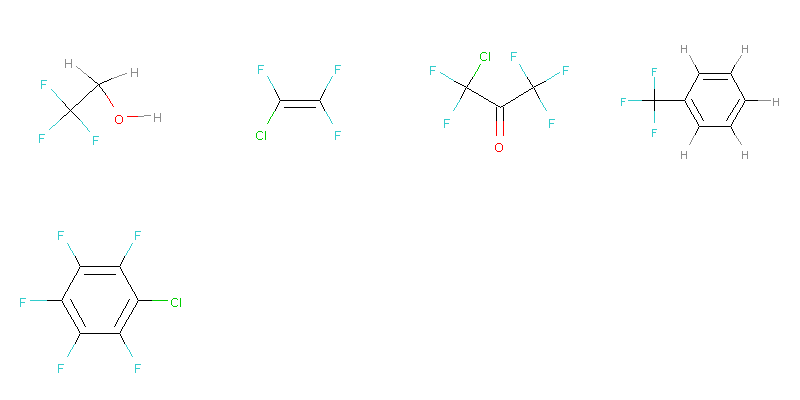

In [37]:
draw.show(index=[1,5,7,8,20])

In [38]:
commonsub=draw.common_substr(index=[1,5,7,8,20])

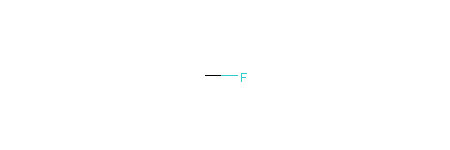

In [39]:
draw.show_substr(commonsub)